In [60]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import scipy.stats as stats

In [45]:
df = pd.read_csv("state_voter_turnout.csv")
x = df.pop("Year").values
x1 = df.pop("Alphanumeric State Code").values
x2 = df.pop("Voting-Eligible Population (VEP)").values
x3 = df.pop("Voting-Age Population (VAP)").values
y = df.pop("VEP Highest Office").values

Years = []
for i in range(len(x)):
    Years.append([x[i], x1[i], x2[i], x3[i]])
X = np.array(Years)
y = np.array(y)

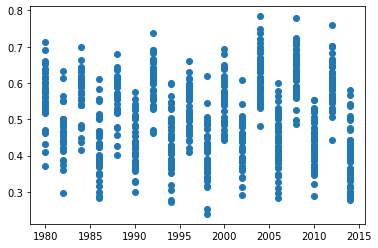

In [46]:
#Show a scatter plot of the data
plt.scatter(x, y)
plt.show()

17
17


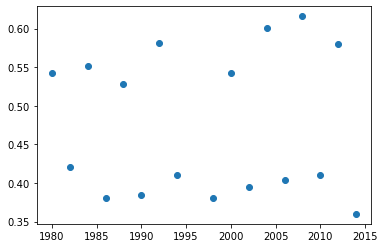

In [48]:
unitedStates = []
uniqueYears = []
for i in range(len(X)):
    if (X[i, 1] == 0):
        unitedStates.append(y[i])
        if (X[i, 0] not in uniqueYears):
            uniqueYears.append(X[i, 0])

print(len(unitedStates))
print(len(uniqueYears))
plt.scatter(uniqueYears[::-1], unitedStates[::-1])
plt.show()

In [49]:
svr_rbf = SVR(kernel='rbf', C=800, gamma=0.1, epsilon=0.1)

In [52]:
a = svr_rbf.fit(X, y).predict(X)

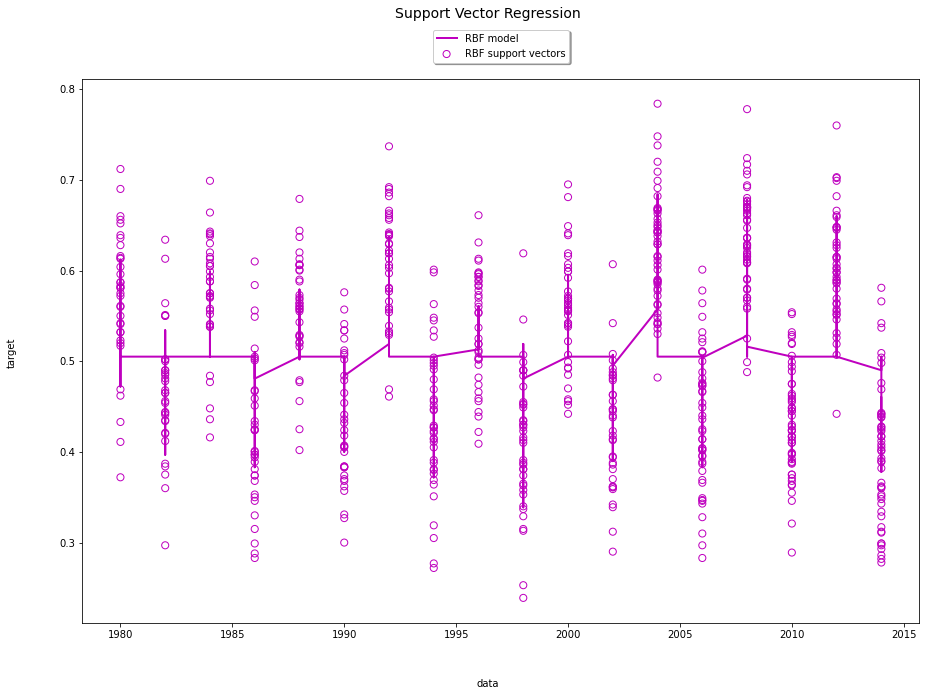

In [53]:
lw = 2

svrs = [svr_rbf]
kernel_label = ['RBF']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(figsize=(15,10))
axes.plot(x, svr_rbf.fit(X, y).predict(X), color='m', lw=lw,
              label='{} model'.format('RBF'))
axes.scatter(x, y, facecolor="none",
                 edgecolor='m', s=50,
                 label='{} support vectors'.format('RBF'))
axes.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [54]:
a1 = svr_rbf.fit(X, y).predict([[2014, 0, 227157964, 245712915], [1988, 27, 568014, 573791]]) #0.36, 0.644
a1

array([0.45993224, 0.54405724])

In [63]:
#mean square error
mse = np.mean((a-y)**2)
mse

0.006197360097818806

In [66]:
rmse = np.sqrt(mse)
rmse

0.07872331355969975

In [67]:
confidence = svr_rbf.fit(X, y).score(X, y)
confidence

0.4674921428747627